In [3]:
import pandas as pd
import random as rd
import numpy as np
import matplotlib.pyplot as plt
import redes1
import ElFarolFunciones as F
import seaborn as sns

### 100 simulaciones, 100 iteraciones, 100 individuos
Red Anillo, umbral  $\mu=\frac{1}{2}$

In [3]:
Num_agentes = 100
Num_iteraciones = 100
PARS = [Num_agentes, 1]
redes1.create_graph(Num_agentes, 'CloseRing', 0, True)
identificador = 0
UMBRAL = 0.5
inicial = True
No_exper = 100
F.simulacion(Num_agentes,Num_iteraciones,UMBRAL,inicial,identificador,PARS)
inicial = False
for N in range(No_exper - 1):
    identificador += 1
    F.simulacion(Num_agentes,Num_iteraciones,UMBRAL,inicial,identificador,PARS)#Num_agentes = 100

In [5]:
data = pd.read_csv('agentes_anillo.csv')
data = data[data['Identificador'] != 'Identificador']
data['Identificador'] = data['Identificador'].astype(int)
data['Estado'] = data['Estado'].astype(int)
data['Ronda'] = data['Ronda'].astype(int)
data['Agente'] = data['Agente'].astype(int)
data['Politica'] = data['Politica'].astype(int)
data['Puntaje'] = data['Puntaje'].astype(int)
#data['Estado'].unique()
df = pd.DataFrame(data.groupby(['Identificador','Ronda'])['Estado'].mean()).reset_index()
df.columns = ['Identificador','Ronda','Asistencia']
df['Asistencia'] = df['Asistencia'] * 100
df.head()

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Identificador,Ronda,Asistencia
0,0,0,43.269231
1,0,1,50.000000
2,0,2,71.153846
3,0,3,50.000000
4,0,4,44.230769


Text(0.5, 1.0, 'Asistencia a El Farol por ronda')

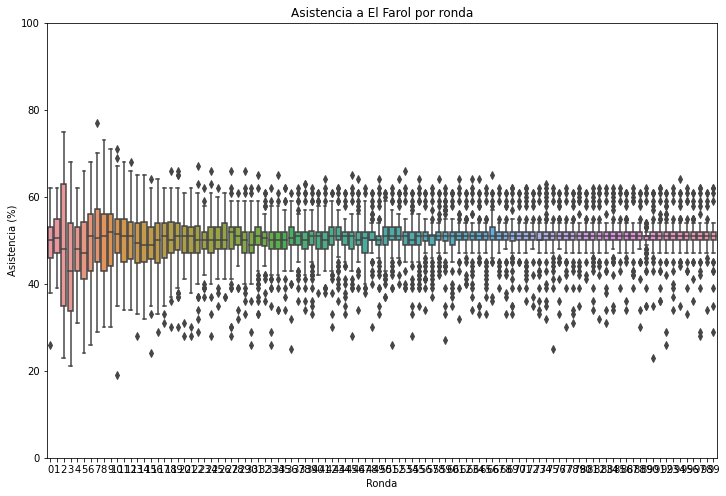

In [5]:
fig,ax = plt.subplots(figsize=(12,8))
ax = sns.boxplot(x='Ronda',y='Asistencia',data=df)
plt.ylabel('Asistencia (%)')
plt.ylim(0,100)
plt.title('Asistencia a El Farol por ronda')

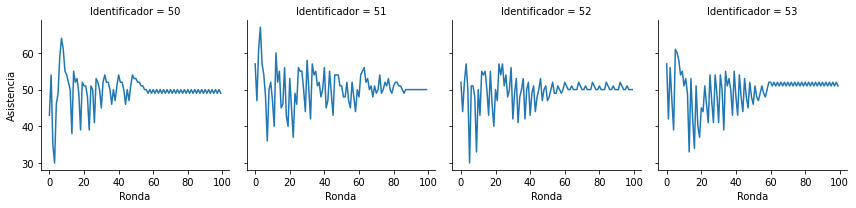

In [18]:
identificadores = list(df['Identificador'].unique())[50:54]
df2 = df[df['Identificador'].isin(identificadores)]
g = sns.FacetGrid(df2,col='Identificador')
g.map(plt.plot,'Ronda','Asistencia')

In [6]:
df = pd.DataFrame(data.groupby(['Ronda','Politica'])['Agente'].count()).reset_index()
df.columns = ['Ronda', 'Politica', 'num_agentes']
uso_politica = pd.pivot_table(
    data=df,
    index='Ronda',
    values='num_agentes',
    columns='Politica',
    aggfunc='sum'
).reset_index()
uso_politica = uso_politica.sort_values(by='Ronda',ascending=False)
uso_politica = uso_politica.set_index('Ronda')
uso_politica.head()

Politica,0,1,2,3,4,5,6,7
Ronda,,,,,,,,
99,207,656,261,2609,4812,488,85,882
98,210,656,264,2602,4805,486,89,888
97,214,659,259,2600,4799,490,87,892
96,212,659,256,2600,4795,497,85,896
95,210,666,257,2602,4783,500,85,897


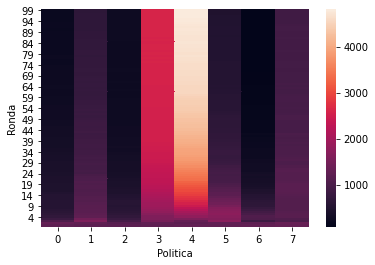

In [24]:
ax = sns.heatmap(uso_politica)

In [9]:
primeras = uso_politica[:10]
primeras = primeras.sort_values(by='Ronda',ascending=False)
primeras = primeras.set_index('Ronda')
sd = sns.heatmap(primeras)

KeyError: "None of ['Ronda'] are in the columns"